In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv("house.csv")
df.head()

,DOEID,ALTHUQ,WALLTYPE,YEARMADE,URBRUR,UGASHERE,TOTSQFT,TOTBASESQFT,TOTATTCSQFT,TOTGARGSQFT,...,TOTCSQFT,TOTUCSQFT,BASCSQFT,BASUCSQFT,GARCSQFT,GARUCSQFT,ATTCSQFT,ATTUCSQFT,RHMCSQFT,RHMUCSQFT
0,1,9,1,3,1,1,1989,0,0,250,...,1739,250,0,0,0,250,0,0,1739,0
1,2,9,3,6,3,1,1320,0,660,0,...,1320,660,0,0,0,0,0,660,660,0
2,3,9,1,4,1,1,3075,789,0,400,...,2675,1189,0,789,0,400,0,0,1886,0
3,4,9,3,1,2,0,899,0,0,0,...,0,899,0,0,0,0,0,0,0,899
4,5,9,1,8,3,1,2176,0,444,400,...,1776,844,0,0,0,400,0,444,1332,0


In [3]:
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 4382
Number of attributes = 31
Number of missing values:
	DOEID: 0
	ALTHUQ: 0
	WALLTYPE: 0
	YEARMADE: 0
	URBRUR: 0
	UGASHERE: 0
	TOTSQFT: 0
	TOTBASESQFT: 0
	TOTATTCSQFT: 0
	TOTGARGSQFT: 0
	TOTRHMSQFT: 0
	TOTHSQFT: 0
	TOTUSQFT: 0
	BASHSQFT: 0
	BASUSQFT: 0
	GARHSQFT: 0
	GARUSQFT: 0
	ATTHSQFT: 0
	ATTUSQFT: 0
	RHMHSQFT: 0
	RHMUSQFT: 0
	TOTCSQFT: 0
	TOTUCSQFT: 0
	BASCSQFT: 0
	BASUCSQFT: 0
	GARCSQFT: 0
	GARUCSQFT: 0
	ATTCSQFT: 0
	ATTUCSQFT: 0
	RHMCSQFT: 0
	RHMUCSQFT: 0


In [4]:
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_file("house_report.html")

DATA PROFILING

In [7]:
df_profiling = df.drop(['DOEID','ALTHUQ','WALLTYPE','YEARMADE','URBRUR','UGASHERE'], axis = 1)
print('Number of instances = %d' % (df_profiling.shape[0]))
print('Number of attributes = %d' % (df_profiling.shape[1]))
df_profiling

Number of instances = 4382
Number of attributes = 25


,TOTSQFT,TOTBASESQFT,TOTATTCSQFT,TOTGARGSQFT,TOTRHMSQFT,TOTHSQFT,TOTUSQFT,BASHSQFT,BASUSQFT,GARHSQFT,...,TOTCSQFT,TOTUCSQFT,BASCSQFT,BASUCSQFT,GARCSQFT,GARUCSQFT,ATTCSQFT,ATTUCSQFT,RHMCSQFT,RHMUCSQFT
0,1989,0,0,250,1739,1739,250,0,0,0,...,1739,250,0,0,0,250,0,0,1739,0
1,1320,0,660,0,660,660,660,0,0,0,...,1320,660,0,0,0,0,0,660,660,0
2,3075,789,0,400,1886,1886,1189,0,789,0,...,2675,1189,0,789,0,400,0,0,1886,0
3,899,0,0,0,899,899,0,0,0,0,...,0,899,0,0,0,0,0,0,0,899
4,2176,0,444,400,1332,1332,844,0,0,0,...,1776,844,0,0,0,400,0,444,1332,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,1129,0,0,0,1129,1129,0,0,0,0,...,451,1129,0,0,0,0,0,0,0,1129
4378,1904,0,0,0,1904,1904,0,0,0,0,...,0,1904,0,0,0,0,0,0,0,1904
4379,750,0,0,0,750,750,0,0,0,0,...,0,750,0,0,0,0,0,0,0,750
4380,980,0,0,0,980,980,0,0,0,0,...,980,0,0,0,0,0,0,0,980,0


In [19]:
# Initialize an empty dictionary to hold summary statistics
summary_stats = {
    'Min': [],
    'Max': [],
    'Mean': [],
    'Median': [],
    'Standard Deviation': [],
    'Number of Unique Values': [],
}

# Iterate through each column in the DataFrame
for column in df_profiling.columns:
    summary_stats['Min'].append(df_profiling[column].min())
    summary_stats['Max'].append(df_profiling[column].max())
    summary_stats['Mean'].append(df_profiling[column].mean())
    summary_stats['Median'].append(df_profiling[column].median())
    summary_stats['Standard Deviation'].append(df_profiling[column].std())
    summary_stats['Number of Unique Values'].append(df_profiling[column].nunique())

# Convert the dictionary into a DataFrame
summary_df = pd.DataFrame(summary_stats, index=df_profiling.columns)

# Display the summary DataFrame
summary_df


,Min,Max,Mean,Median,Standard Deviation,Number of Unique Values
TOTSQFT,167,11383,2284.172980,1848.0,1623.199664,2138
TOTBASESQFT,0,4736,353.820630,0.0,598.806793,701
TOTATTCSQFT,0,4651,263.141944,0.0,604.229773,538
TOTGARGSQFT,0,650,138.760840,0.0,195.742735,4
TOTRHMSQFT,100,11383,1528.458695,1296.0,917.082711,1876
TOTHSQFT,0,11383,1602.443177,1312.0,1157.501976,2097
TOTUSQFT,0,8682,681.752624,400.0,908.338794,1257
BASHSQFT,0,4736,181.902099,0.0,457.788649,543
BASUSQFT,0,3750,171.932451,0.0,427.136833,567
GARHSQFT,0,650,9.082611,0.0,63.397875,4


In [22]:
col_to_keep = ['ALTHUQ','WALLTYPE','YEARMADE','URBRUR','UGASHERE']
df_profiling_categorical = df[col_to_keep]
df_profiling_categorical

,ALTHUQ,WALLTYPE,YEARMADE,URBRUR,UGASHERE
0,9,1,3,1,1
1,9,3,6,3,1
2,9,1,4,1,1
3,9,3,1,2,0
4,9,1,8,3,1
...,...,...,...,...,...
4377,9,1,6,2,1
4378,9,2,1,1,1
4379,9,2,6,4,0
4380,9,3,7,4,0


In [24]:
# Initialize an empty dictionary to hold summary statistics
summary_stats_cat = {
    'Number of Unique Values': [],
}

# Iterate through each column in the DataFrame
for column in df_profiling_categorical.columns:
    summary_stats_cat['Number of Unique Values'].append(df_profiling_categorical[column].nunique())

# Convert the dictionary into a DataFrame
summary_df_cat = pd.DataFrame(summary_stats_cat, index=df_profiling_categorical.columns)

# Display the summary DataFrame
summary_df_cat

,Number of Unique Values
ALTHUQ,6
WALLTYPE,9
YEARMADE,13
URBRUR,4
UGASHERE,2


In [30]:
# Initialize an empty dictionary to hold the combined value counts for all columns
combined_value_counts = {}

# Iterate through each column and combine value counts
for column in df_profiling_categorical.columns:
    # Get the value counts for the current column
    column_value_counts = df_profiling_categorical[column].value_counts().to_dict()
    
    # Merge with the combined value counts, filling missing entries with zeros
    for value, count in column_value_counts.items():
        if value in combined_value_counts:
            combined_value_counts[value][column] = count
        else:
            combined_value_counts[value] = {col: 0 for col in df_profiling_categorical.columns}
            combined_value_counts[value][column] = count

# Convert the combined value counts into a DataFrame
combined_value_counts_df = pd.DataFrame.from_dict(combined_value_counts, orient='index')

# If you want to fill NaN with zeros (in case some values are not present in certain columns)
combined_value_counts_df = combined_value_counts_df.fillna(0).astype(int)


# Display the DataFrame
combined_value_counts_df.sort_index()


,ALTHUQ,WALLTYPE,YEARMADE,URBRUR,UGASHERE
0,0,0,0,0,1192
1,20,1186,640,1882,3190
2,35,864,281,800,0
3,86,1443,514,826,0
4,79,555,489,874,0
5,48,79,751,0,0
6,0,39,363,0,0
7,0,156,361,0,0
8,0,0,305,0,0
9,4114,54,348,0,0


In [31]:

def NA_func(column, range_):
    # Replace zeros with NaN in 'ALTHUQ' outside the specified index range
    combined_value_counts_df.loc[~combined_value_counts_df.index.isin(index_range_to_keep_zero), column] = combined_value_counts_df.loc[~combined_value_counts_df.index.isin(index_range_to_keep_zero), column].replace(0, np.nan)

for column in combined_value_counts_df.columns:
    if column == "ALTHUQ":
        # Define the index range where you want to keep zeros
        index_range_to_keep_zero = range(1, 6)  # This keeps zeros at indexes 1, 2, 3, 4, 5
        NA_func(column, index_range_to_keep_zero)
    if column == "WALLTYPE":
        # Define the index range where you want to keep zeros
        index_range_to_keep_zero = range(1, 11)  # This keeps zeros at indexes 1, 2, 3, 4, 5
        NA_func(column, index_range_to_keep_zero)
    if column == "YEARMADE":
        # Define the index range where you want to keep zeros
        index_range_to_keep_zero = range(1, 14)  # This keeps zeros at indexes 1, 2, 3, 4, 5
        NA_func(column, index_range_to_keep_zero)
    if column == "URBRUR":
        # Define the index range where you want to keep zeros
        index_range_to_keep_zero = range(1, 5)  # This keeps zeros at indexes 1, 2, 3, 4, 5
        NA_func(column, index_range_to_keep_zero)
    if column == "UGASHERE":
        # Define the index range where you want to keep zeros
        index_range_to_keep_zero = range(0, 2)  # This keeps zeros at indexes 1, 2, 3, 4, 5
        NA_func(column, index_range_to_keep_zero)  

        
# Display the DataFrame
combined_value_counts_df.sort_index()

,ALTHUQ,WALLTYPE,YEARMADE,URBRUR,UGASHERE
0,NaN,NaN,NaN,NaN,1192.0
1,20.0,1186.0,640.0,1882.0,3190.0
2,35.0,864.0,281.0,800.0,NaN
3,86.0,1443.0,514.0,826.0,NaN
4,79.0,555.0,489.0,874.0,NaN
5,48.0,79.0,751.0,NaN,NaN
6,NaN,39.0,363.0,NaN,NaN
7,NaN,156.0,361.0,NaN,NaN
8,NaN,0.0,305.0,NaN,NaN
9,4114.0,54.0,348.0,NaN,NaN


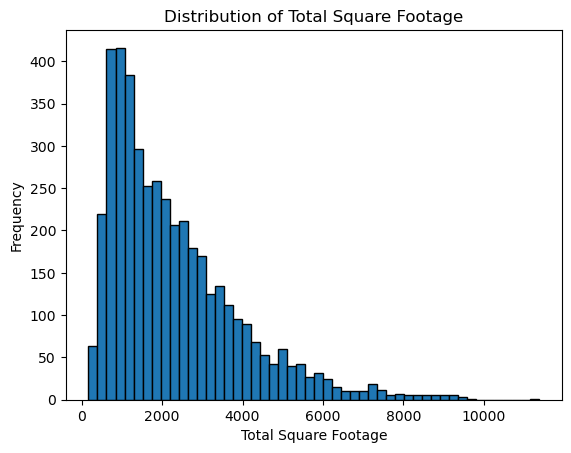

In [35]:
import matplotlib.pyplot as plt

# Histogram of total square footage
df_profiling['TOTSQFT'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Total Square Footage')
plt.xlabel('Total Square Footage')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

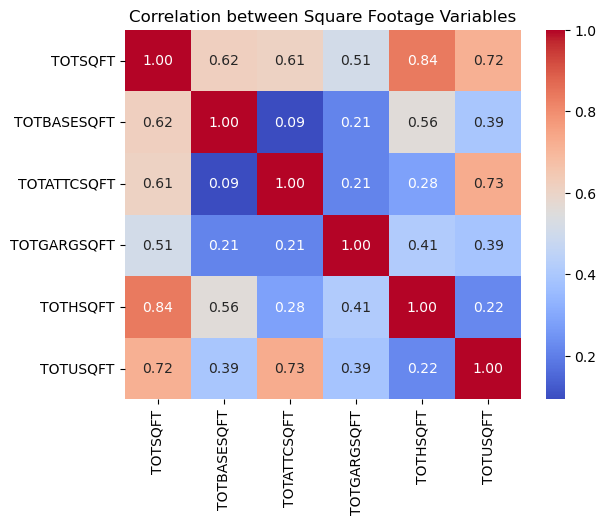

In [39]:
import seaborn as sns

# Calculate correlations
corr = df_profiling[['TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTHSQFT', 'TOTUSQFT']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Square Footage Variables')
plt.show()


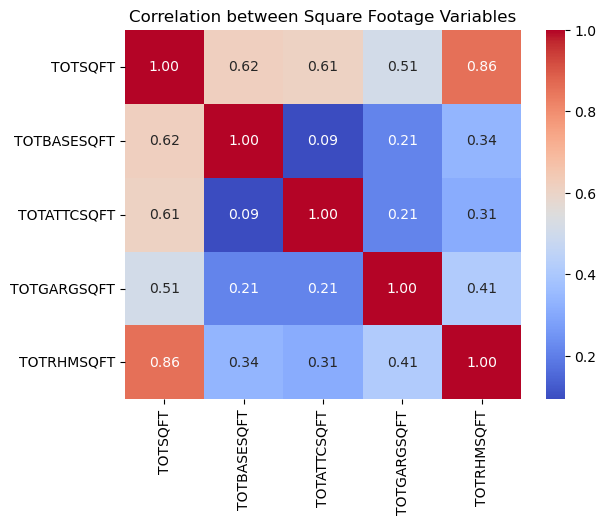

In [43]:
import seaborn as sns

# Calculate correlations
corr = df_profiling[['TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTRHMSQFT']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Square Footage Variables')
plt.show()


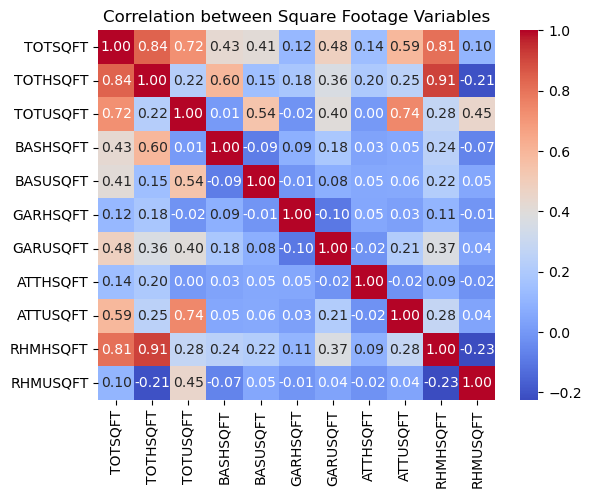

In [41]:
# Calculate correlations
corr = df_profiling[['TOTSQFT','TOTHSQFT', 'TOTUSQFT', 'BASHSQFT', 'BASUSQFT', 'GARHSQFT', 'GARUSQFT','ATTHSQFT', 'ATTUSQFT', 'RHMHSQFT', 'RHMUSQFT']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between heated Square Footage Variables')
plt.show()


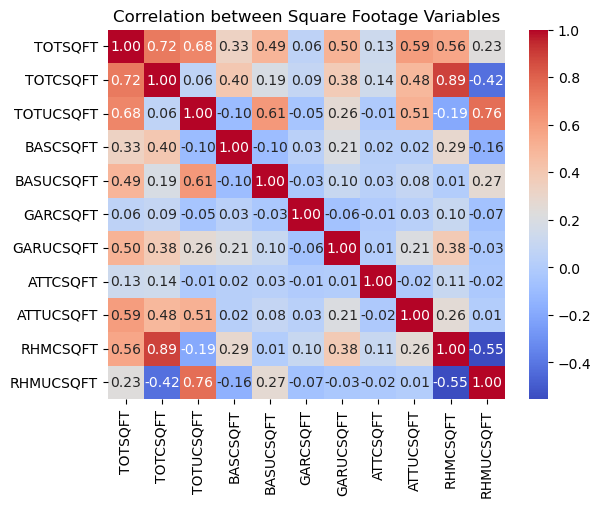

In [42]:

# Calculate correlations
corr = df_profiling[['TOTSQFT','TOTCSQFT', 'TOTUCSQFT','BASCSQFT', 'BASUCSQFT', 'GARCSQFT', 'GARUCSQFT', 'ATTCSQFT', 'ATTUCSQFT', 'RHMCSQFT', 'RHMUCSQFT']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Square Footage Variables')
plt.show()

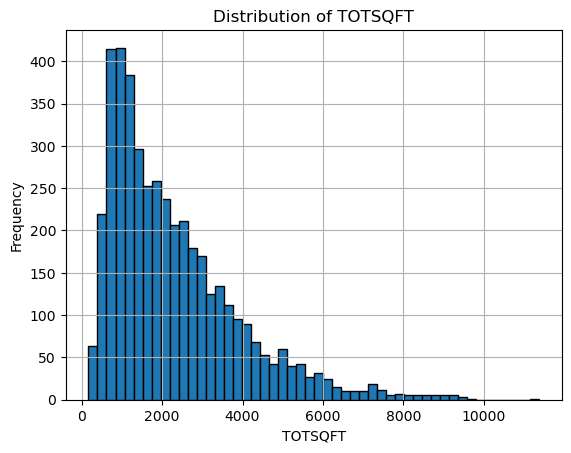

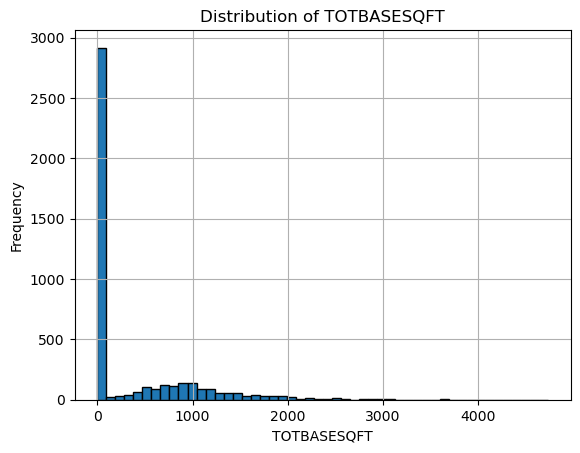

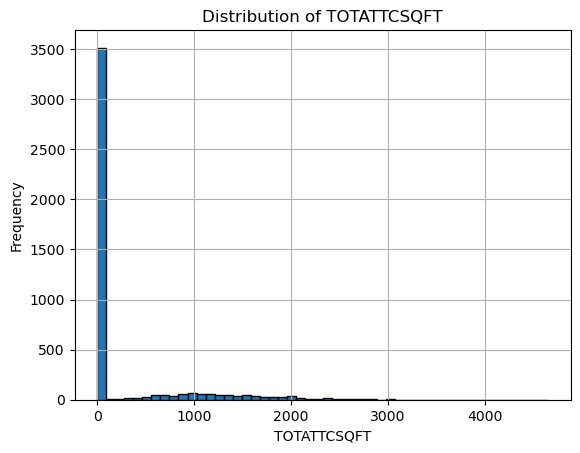

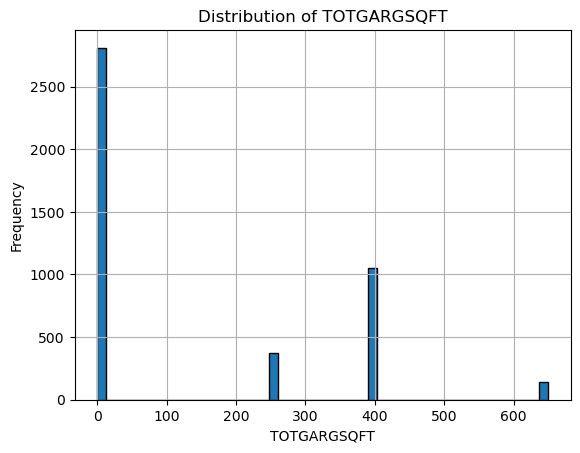

In [44]:
import matplotlib.pyplot as plt

# List of square footage variables
square_footage_vars = ['TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT']

# Create histograms
for var in square_footage_vars:
    df[var].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


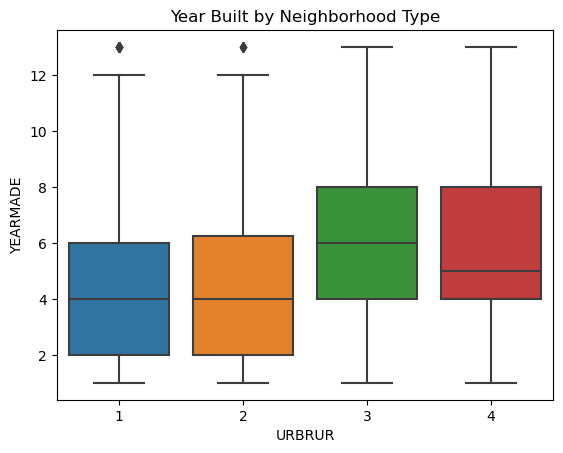

In [45]:
import seaborn as sns

sns.boxplot(x='URBRUR', y='YEARMADE', data=df)
plt.title('Year Built by Neighborhood Type')
plt.show()


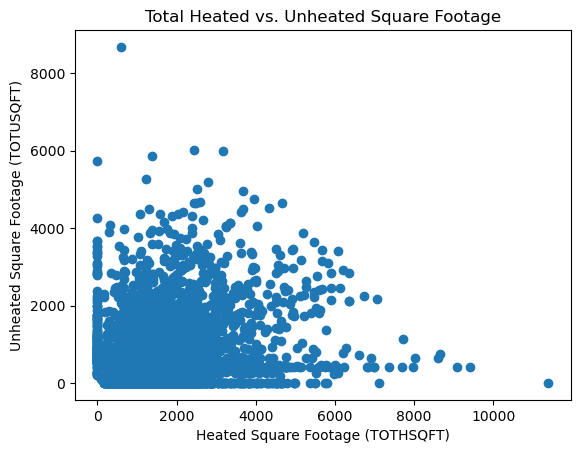

In [46]:
plt.scatter(df['TOTHSQFT'], df['TOTUSQFT'])
plt.title('Total Heated vs. Unheated Square Footage')
plt.xlabel('Heated Square Footage (TOTHSQFT)')
plt.ylabel('Unheated Square Footage (TOTUSQFT)')
plt.show()


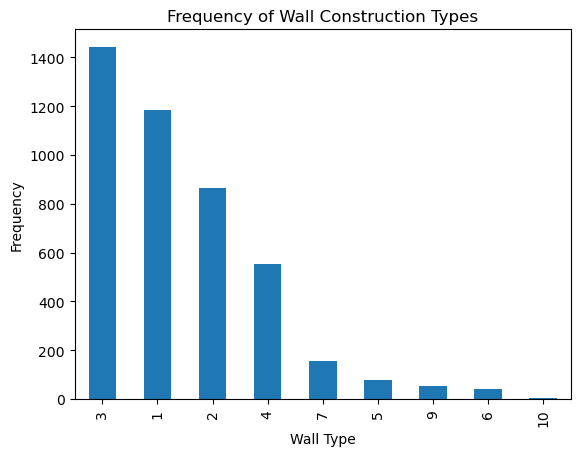

In [47]:
df['WALLTYPE'].value_counts().plot(kind='bar')
plt.title('Frequency of Wall Construction Types')
plt.xlabel('Wall Type')
plt.ylabel('Frequency')
plt.show()


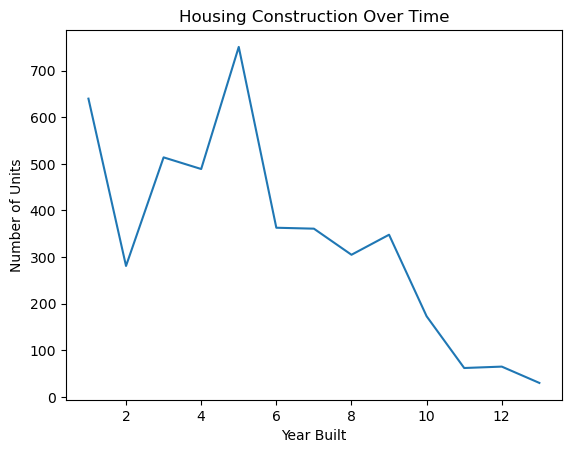

In [49]:
# Assuming df is sorted by YEARMADE
df['YEARMADE'].value_counts().sort_index().plot(kind='line')
plt.title('Housing Construction Over Time')
plt.xlabel('Year Built')
plt.ylabel('Number of Units')
plt.show()


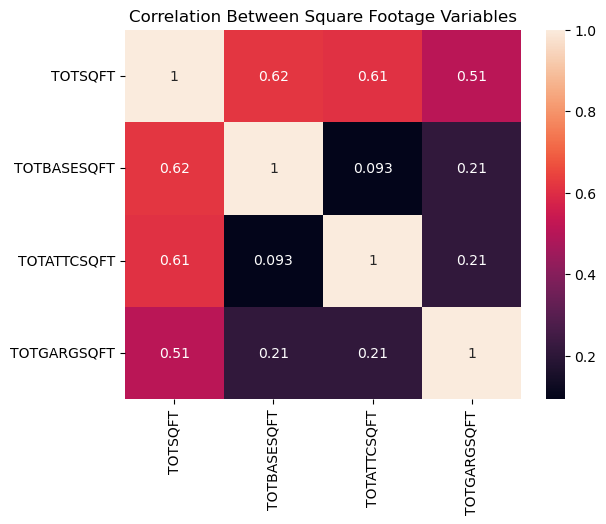

In [50]:
corr = df[square_footage_vars].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Between Square Footage Variables')
plt.show()


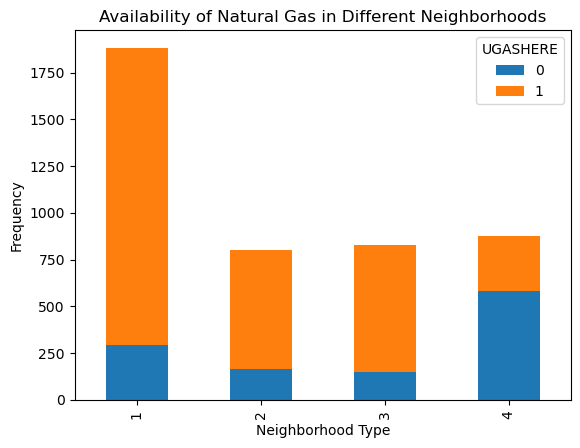

In [51]:
pd.crosstab(df['URBRUR'], df['UGASHERE']).plot(kind='bar', stacked=True)
plt.title('Availability of Natural Gas in Different Neighborhoods')
plt.xlabel('Neighborhood Type')
plt.ylabel('Frequency')
plt.show()


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor  # Import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and merge the data from House.csv and Household.csv based on 'DOEID'
energy_consumption_df = pd.read_csv('energy_consumption.csv')
household_df = pd.read_csv('household.csv')
house_df = pd.read_csv('house.csv')
merged_df = pd.merge(house_df, household_df, on='DOEID')
merged_df = pd.merge(merged_df,energy_consumption_df, on='DOEID')
merged_df = merged_df.dropna()
merged_df.to_csv('final_power_consumption.csv', index=False)
merged_df

,DOEID,ALTHUQ,WALLTYPE,YEARMADE,URBRUR,UGASHERE,TOTSQFT,TOTBASESQFT,TOTATTCSQFT,TOTGARGSQFT,...,BTUNGAPL,BTUNGWTH,BTUNGSPH,BTUFOAPL,BTUFOSPH,BTUFOWTH,BTULPAPL,BTULPSPH,BTULPWTH,BTUWOOD
0,1,9,1,3,1,1,1989,0,0,250,...,9481.0,18266.0,9812.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
1,2,9,3,6,3,1,1320,0,660,0,...,3780.0,13082.0,6458.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
2,3,9,1,4,1,1,3075,789,0,400,...,0.0,20784.0,49394.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
3,4,9,3,1,2,0,899,0,0,0,...,9999999.0,9999999.0,9999999.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
4,5,9,1,8,3,1,2176,0,444,400,...,0.0,0.0,70589.0,9999999,9999999,9999999,9999999,9999999,9999999,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,4378,9,1,6,2,1,1129,0,0,0,...,3994.0,16401.0,51025.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
4378,4379,9,2,1,1,1,1904,0,0,0,...,9999999.0,9999999.0,9999999.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999
4379,4380,9,2,6,4,0,750,0,0,0,...,9999999.0,9999999.0,9999999.0,0,141684,0,9999999,9999999,9999999,9999999
4380,4381,9,3,7,4,0,980,0,0,0,...,9999999.0,9999999.0,9999999.0,9999999,9999999,9999999,9999999,9999999,9999999,9999999


In [119]:

features = ['YEARMADE', 'URBRUR', 'UGASHERE', 'TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTRHMSQFT', 'TOTHSQFT',
            'BASHSQFT', 'GARHSQFT', 'ATTHSQFT', 'RHMHSQFT', 'TOTCSQFT', 'TOTCSQFT', 'BASCSQFT',
            'GARCSQFT', 'ATTCSQFT', 'RHMCSQFT','NHSLDMEM', 'MONEYPY','BTUELCDR','BTUELDWH','BTUELFZZ','BTUELRFG',
 'HD65', 'CD65', 'BTUEL', 'GALLONFO',  'GALLONLP',  'GALLONKR', 'BTUELCOL', 'BTUELWTH', 'BTUELSPH', 'BTUELAPL']
target = 'KWH'

X = merged_df[features]
y = merged_df[target]

for column in X.columns:
    nan_count_column = merged_df[column].isna().sum()
    print(f"Total NaN values in {column}: {nan_count_column}")

X

Total NaN values in YEARMADE: 0
Total NaN values in URBRUR: 0
Total NaN values in UGASHERE: 0
Total NaN values in TOTSQFT: 0
Total NaN values in TOTBASESQFT: 0
Total NaN values in TOTATTCSQFT: 0
Total NaN values in TOTGARGSQFT: 0
Total NaN values in TOTRHMSQFT: 0
Total NaN values in TOTHSQFT: 0
Total NaN values in BASHSQFT: 0
Total NaN values in GARHSQFT: 0
Total NaN values in ATTHSQFT: 0
Total NaN values in RHMHSQFT: 0
Total NaN values in TOTCSQFT: 0
Total NaN values in TOTCSQFT: 0
Total NaN values in BASCSQFT: 0
Total NaN values in GARCSQFT: 0
Total NaN values in ATTCSQFT: 0
Total NaN values in RHMCSQFT: 0
Total NaN values in NHSLDMEM: 0
Total NaN values in MONEYPY: 0
Total NaN values in BTUELCDR: 0
Total NaN values in BTUELDWH: 0
Total NaN values in BTUELFZZ: 0
Total NaN values in BTUELRFG: 0
Total NaN values in HD65: 0
Total NaN values in CD65: 0
Total NaN values in BTUEL: 0
Total NaN values in GALLONFO: 0
Total NaN values in GALLONLP: 0
Total NaN values in GALLONKR: 0
Total NaN va

,YEARMADE,URBRUR,UGASHERE,TOTSQFT,TOTBASESQFT,TOTATTCSQFT,TOTGARGSQFT,TOTRHMSQFT,TOTHSQFT,BASHSQFT,...,HD65,CD65,BTUEL,GALLONFO,GALLONLP,GALLONKR,BTUELCOL,BTUELWTH,BTUELSPH,BTUELAPL
0,3,1,1,1989,0,0,250,1739,1739,0,...,1231,3281,45922,999999,999999,999999,29630,0,0,12070
1,6,3,1,1320,0,660,0,660,660,0,...,1663,1123,44529,999999,999999,999999,10040,0,1356,29041
2,4,1,1,3075,789,0,400,1886,1886,0,...,5221,1286,66411,999999,999999,999999,16657,0,0,29908
3,1,2,0,899,0,0,0,899,899,0,...,5261,667,97703,999999,999999,999999,0,31876,13724,46831
4,8,3,1,2176,0,444,400,1332,1332,0,...,4392,1238,97781,999999,999999,999999,15836,23262,0,46348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,6,2,1,1129,0,0,0,1129,1129,0,...,4910,1337,29309,999999,999999,999999,4076,0,0,19100
4378,1,1,1,1904,0,0,0,1904,1904,0,...,3272,1927,48815,999999,999999,240,0,12753,0,29327
4379,6,4,0,750,0,0,0,750,750,0,...,7162,60,26425,1022,999999,999999,0,7446,2351,13856
4380,7,4,0,980,0,0,0,980,980,0,...,3474,2110,56875,999999,999999,999999,12871,7978,7814,24448


In [120]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Root Mean Squared Error (RMSE): 1128.9513472666313
Mean Absolute Error (MAE): 134.7281191847518
R-squared (R2) Score: 0.9792027752291881


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = merged_df[features]
y = merged_df[target]

from sklearn.impute import SimpleImputer

# Create a SimpleImputer with a chosen strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='median')



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 248718.18090205244
Root Mean Squared Error (RMSE): 498.71653361609384
R-squared (R2) Score: 0.9959415288240316


In [122]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess your data (load 'X' and 'y')

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature rankings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_ranking = feature_ranking.sort_values(by='Importance', ascending=False)

# Display the feature ranking
feature_ranking


,Feature,Importance
27,BTUEL,9.988017e-01
22,BTUELDWH,3.652173e-04
33,BTUELSPH,1.123917e-04
34,BTUELAPL,9.839068e-05
23,BTUELFZZ,8.134013e-05
26,CD65,5.429057e-05
32,BTUELWTH,5.074593e-05
8,TOTHSQFT,4.691263e-05
31,BTUELCOL,4.264214e-05
2,UGASHERE,3.861307e-05


In [123]:
# Calculate correlations
corr = merged_df[['KWH','YEARMADE', 'URBRUR', 'UGASHERE', 'TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTRHMSQFT', 'TOTHSQFT',
            'BASHSQFT', 'GARHSQFT', 'ATTHSQFT', 'RHMHSQFT', 'TOTCSQFT', 'TOTCSQFT', 'BASCSQFT',
            'GARCSQFT', 'ATTCSQFT', 'RHMCSQFT','NHSLDMEM', 'MONEYPY','BTUELCDR','BTUELDWH','BTUELFZZ','BTUELRFG',
 'HD65', 'CD65', 'BTUEL', 'GALLONFO',  'GALLONLP',  'GALLONKR', 'BTUELCOL', 'BTUELWTH', 'BTUELSPH', 'BTUELAPL']].corr()

corr_2 = merged_df[['KWH','YEARMADE', 'URBRUR', 'UGASHERE', 'TOTSQFT', 'TOTBASESQFT', 'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTRHMSQFT', 'TOTHSQFT',
            'BASHSQFT', 'GARHSQFT', 'ATTHSQFT', 'RHMHSQFT', 'TOTCSQFT', 'TOTCSQFT', 'BASCSQFT',
            'GARCSQFT', 'ATTCSQFT', 'RHMCSQFT','NHSLDMEM', 'MONEYPY','BTUELCDR','BTUELDWH','BTUELFZZ','BTUELRFG',
 'HD65', 'CD65', 'BTUEL', 'GALLONFO',  'GALLONLP',  'GALLONKR', 'BTUELCOL', 'BTUELWTH', 'BTUELSPH', 'BTUELAPL']].corr()

corr


,KWH,YEARMADE,URBRUR,UGASHERE,TOTSQFT,TOTBASESQFT,TOTATTCSQFT,TOTGARGSQFT,TOTRHMSQFT,TOTHSQFT,...,HD65,CD65,BTUEL,GALLONFO,GALLONLP,GALLONKR,BTUELCOL,BTUELWTH,BTUELSPH,BTUELAPL
KWH,1.000000,0.233573,0.229694,-0.213359,0.341673,0.080124,0.221024,0.259827,0.351354,0.329319,...,-0.182217,0.283151,1.000000,0.093978,-0.105748,-0.012404,0.703869,0.582981,0.471760,0.867619
YEARMADE,0.233573,1.000000,0.187904,-0.155540,0.122565,-0.064075,0.034570,0.349645,0.161380,0.146187,...,-0.132693,0.137303,0.233572,0.192168,-0.066861,0.022589,0.241944,0.126480,0.176779,0.154562
URBRUR,0.229694,0.187904,1.000000,-0.363319,0.213651,0.131010,0.068438,0.134372,0.218845,0.222044,...,0.113857,-0.058676,0.229693,-0.082392,-0.347937,-0.092357,0.059352,0.181228,0.114353,0.238077
UGASHERE,-0.213359,-0.155540,-0.363319,1.000000,0.015446,0.021088,0.005073,0.082770,-0.007438,0.030977,...,0.056753,-0.125767,-0.213359,0.206827,0.364365,0.074268,-0.081490,-0.414999,-0.274028,-0.072180
TOTSQFT,0.341673,0.122565,0.213651,0.015446,1.000000,0.619166,0.608712,0.510667,0.855617,0.838118,...,0.127531,-0.064317,0.341674,-0.115152,-0.097086,0.014117,0.214350,-0.022156,-0.010170,0.444621
TOTBASESQFT,0.080124,-0.064075,0.131010,0.021088,0.619166,1.000000,0.092926,0.209523,0.337008,0.560184,...,0.393980,-0.259116,0.080124,-0.213225,-0.048721,-0.007732,-0.087867,-0.069340,-0.093298,0.226498
TOTATTCSQFT,0.221024,0.034570,0.068438,0.005073,0.608712,0.092926,1.000000,0.211633,0.312625,0.281379,...,-0.081018,0.108713,0.221025,-0.048030,-0.036853,0.003135,0.237700,-0.000777,0.016042,0.224696
TOTGARGSQFT,0.259827,0.349645,0.134372,0.082770,0.510667,0.209523,0.211633,1.000000,0.414197,0.413076,...,-0.060563,0.022453,0.259828,0.044076,-0.016087,0.048037,0.208509,-0.066327,-0.019143,0.330301
TOTRHMSQFT,0.351354,0.161380,0.218845,-0.007438,0.855617,0.337008,0.312625,0.414197,1.000000,0.844126,...,0.034786,-0.021078,0.351355,-0.042348,-0.112313,0.017717,0.235645,0.020727,0.036431,0.420538
TOTHSQFT,0.329319,0.146187,0.222044,0.030977,0.838118,0.560184,0.281379,0.413076,0.844126,1.000000,...,0.197060,-0.109146,0.329320,-0.069266,-0.091488,0.016240,0.201346,-0.023344,0.017213,0.426001


In [112]:
X.columns

Index(['YEARMADE', 'URBRUR', 'UGASHERE', 'TOTSQFT', 'TOTBASESQFT',
       'TOTATTCSQFT', 'TOTGARGSQFT', 'TOTRHMSQFT', 'TOTHSQFT', 'BASHSQFT',
       'GARHSQFT', 'ATTHSQFT', 'RHMHSQFT', 'TOTCSQFT', 'TOTCSQFT', 'BASCSQFT',
       'GARCSQFT', 'ATTCSQFT', 'RHMCSQFT', 'NHSLDMEM', 'MONEYPY', 'HD65',
       'CD65', 'BTUEL', 'GALLONFO', 'GALLONLP', 'GALLONKR', 'BTUELCOL',
       'BTUELWTH', 'BTUELSPH', 'BTUELAPL'],
      dtype='object')

In [124]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'df' with features and the target variable
#features = merged_df.drop('KWH', axis=1)  # Drop the target variable from the features
#target = merged_df['KWH']
correlation_values = X.corrwith(y)
sorted_correlations = correlation_values.sort_values(ascending=False)
sorted_correlations

BTUEL          1.000000
BTUELAPL       0.867619
BTUELCOL       0.703869
BTUELRFG       0.631181
BTUELWTH       0.582981
BTUELCDR       0.577811
BTUELDWH       0.516080
BTUELSPH       0.471760
RHMCSQFT       0.455761
TOTCSQFT       0.429137
TOTCSQFT       0.429137
BTUELFZZ       0.381695
TOTRHMSQFT     0.351354
RHMHSQFT       0.342489
TOTSQFT        0.341673
TOTHSQFT       0.329319
NHSLDMEM       0.283831
CD65           0.283151
MONEYPY        0.262846
TOTGARGSQFT    0.259827
YEARMADE       0.233573
URBRUR         0.229694
TOTATTCSQFT    0.221024
BASCSQFT       0.146035
BASHSQFT       0.104168
ATTCSQFT       0.098505
GALLONFO       0.093978
ATTHSQFT       0.087590
GARCSQFT       0.085802
TOTBASESQFT    0.080124
GARHSQFT       0.068275
GALLONKR      -0.012404
GALLONLP      -0.105748
HD65          -0.182217
UGASHERE      -0.213359
dtype: float64

Test

In [128]:
y

0       13459
1       13051
2       19464
3       28635
4       28658
        ...  
4377     8590
4378    14307
4379     7745
4380    16669
4381    11656
Name: KWH, Length: 4381, dtype: int64

In [126]:

features = ['BTUEL','BTUELAPL','BTUELCOL','BTUELRFG','BTUELWTH','BTUELCDR']
target = 'KWH'

X = merged_df[features]
y = merged_df[target]

X

,BTUEL,BTUELAPL,BTUELCOL,BTUELRFG,BTUELWTH,BTUELCDR
0,45922,12070,29630,4222,0,0
1,44529,29041,10040,4092,0,4261
2,66411,29908,16657,19846,0,3414
3,97703,46831,0,5272,31876,9833
4,97781,46348,15836,12335,23262,5121
...,...,...,...,...,...,...
4377,29309,19100,4076,6133,0,4152
4378,48815,29327,0,6735,12753,0
4379,26425,13856,0,2772,7446,3417
4380,56875,24448,12871,3764,7978,3661


In [151]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 1194260.7963616797
Root Mean Squared Error (RMSE): 1092.8223992770645
Mean Absolute Error (MAE): 126.38305731150152
R-squared (R2) Score: 0.9805125905913102


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

'''
X = merged_df[features]
y = merged_df[target]

from sklearn.impute import SimpleImputer

# Create a SimpleImputer with a chosen strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='median')
'''


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the imputer on the training data and transform both training and test data
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Squared Error (MSE): 144687.48760866598
Root Mean Squared Error (RMSE): 380.37808507939303
Mean Absolute Error (MAE): 25.44264538198407
R-squared (R2) Score: 0.9976390547894274


In [150]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 0.029332087808645758
Root Mean Squared Error (RMSE): 0.17126613152823228
Mean Absolute Error (MAE): 0.11858364503923548
R-squared (R2) Score: 0.9999999995213722


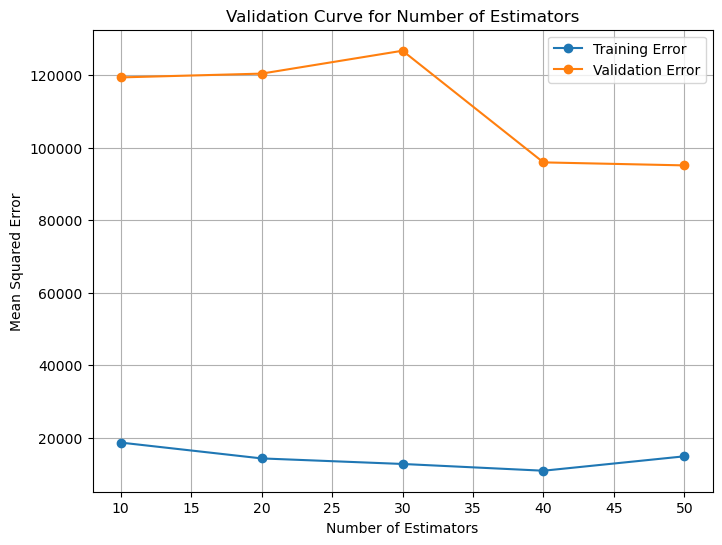

In [140]:
from sklearn.model_selection import validation_curve

# Define the parameter values to evaluate
param_range = [10, 20, 30, 40, 50]

# Compute training and validation scores
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),  # Your regression model
    X, y, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error"
)

# Calculate the mean squared error for training and test data
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mse, label="Training Error", marker='o')
plt.plot(param_range, test_mse, label="Validation Error", marker='o')
plt.title("Validation Curve for Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


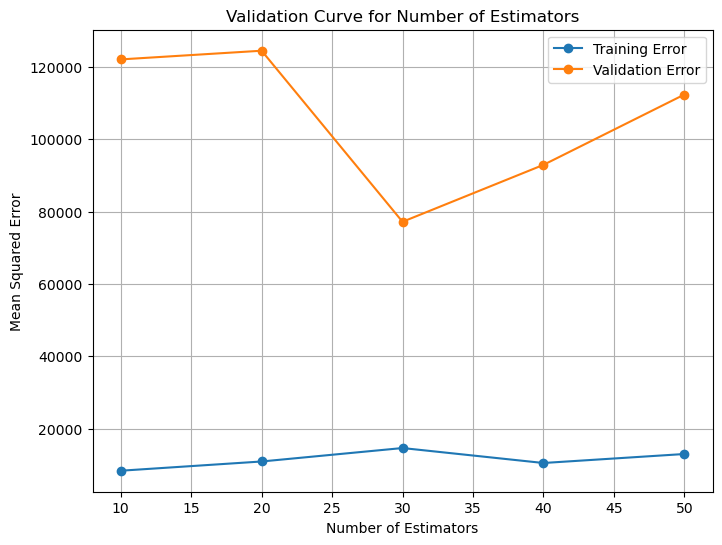

In [142]:
from sklearn.model_selection import validation_curve

# Define the parameter values to evaluate
param_range = [10, 20, 30, 40, 50]

# Compute training and validation scores
train_scores, test_scores = validation_curve(
    RandomForestRegressor(),  # Your regression model
    X, y, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error"
)

# Calculate the mean squared error for training and test data
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mse, label="Training Error", marker='o')
plt.plot(param_range, test_mse, label="Validation Error", marker='o')
plt.title("Validation Curve for Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


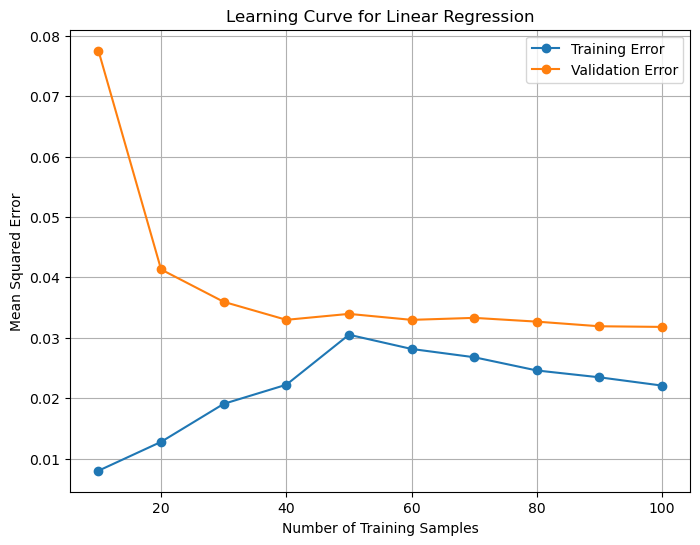

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
# Define the parameter values to evaluate (if applicable)
param_range = [10, 20, 30, 40, 50,60,70,80,90,100]  # You can also use different parameter values

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(),  # Your regression model
    X, y, train_sizes=param_range, cv=5,
    scoring="neg_mean_squared_error"
)

# Calculate the mean squared error for training and test data
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mse, label="Training Error", marker='o')
plt.plot(train_sizes, test_mse, label="Validation Error", marker='o')
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of Training Samples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [147]:
from sklearn.experimental import enable_hist_gradient_boosting  # Enable HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 1092.8223992770645


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming you have X (features) and y (target) ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVR model
model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Assuming you have X (features) and y (target) ready

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an SVR model
model = SVR(kernel='poly')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')
